In [16]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [17]:
(train_images , train_labels) , (test_images , test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [33]:
model = keras.Sequential(
    [
        layers.Flatten(input_shape=(28, 28)), # Add a Flatten layer
        layers.Dense(512 , activation = "relu"),
        layers.Dense(10 , activation = "softmax")
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model.compile(
    optimizer = "rmsprop",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [37]:
# Here we are use 9 epochs for the best practice because after 9 the model gets overfit
history = model.fit(train_images , train_labels , epochs = 9, batch_size = 128 , validation_split=0.2)

Epoch 1/9
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9870 - loss: 0.1949 - val_accuracy: 0.9664 - val_loss: 0.9786
Epoch 2/9
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9878 - loss: 0.1863 - val_accuracy: 0.9703 - val_loss: 0.8508
Epoch 3/9
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9894 - loss: 0.1600 - val_accuracy: 0.9683 - val_loss: 0.9729
Epoch 4/9
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9899 - loss: 0.1461 - val_accuracy: 0.9654 - val_loss: 1.0207
Epoch 5/9
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9917 - loss: 0.1258 - val_accuracy: 0.9688 - val_loss: 0.9657
Epoch 6/9
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9904 - loss: 0.1470 - val_accuracy: 0.9707 - val_loss: 1.1130
Epoch 7/9
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9917 - loss: 0.1425 - val_accuracy: 0.9703 - val_loss: 1.1021
Epoch 8/9
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9929 - loss: 0.1189 - val_accuracy: 0.

In [36]:
test_loss , test_acc = model.evaluate(test_images , test_labels)
print(f"Test accuracy: {test_acc*100:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9659 - loss: 0.9452
Test accuracy: 97.19


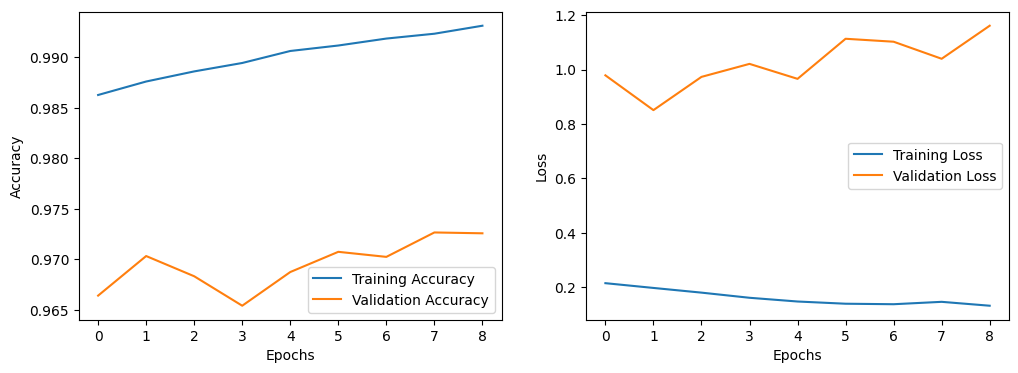

In [38]:
accuracy = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()